In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import itertools
import seaborn

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
mileage = df[['Mileage']]
price = df[['Price']]

In [5]:
linreg = linear_model.LinearRegression()
linreg.fit(mileage, price)
# print intercept and coefficients
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)

# calculate the R-squared
print('R-squared:', linreg.score(mileage, price))

Intercept: [ 24764.55900606]
Coefficient: [[-0.1725205]]
R-squared: 0.0204634473235


/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


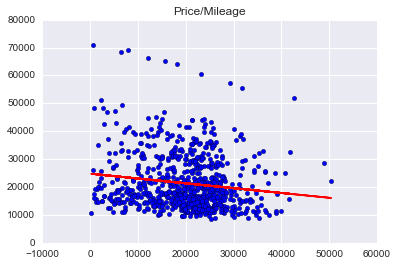

In [6]:
plt.scatter(mileage, price)
plt.plot(mileage, linreg.predict(mileage), c='r')
plt.title('Price/Mileage')
plt.show()

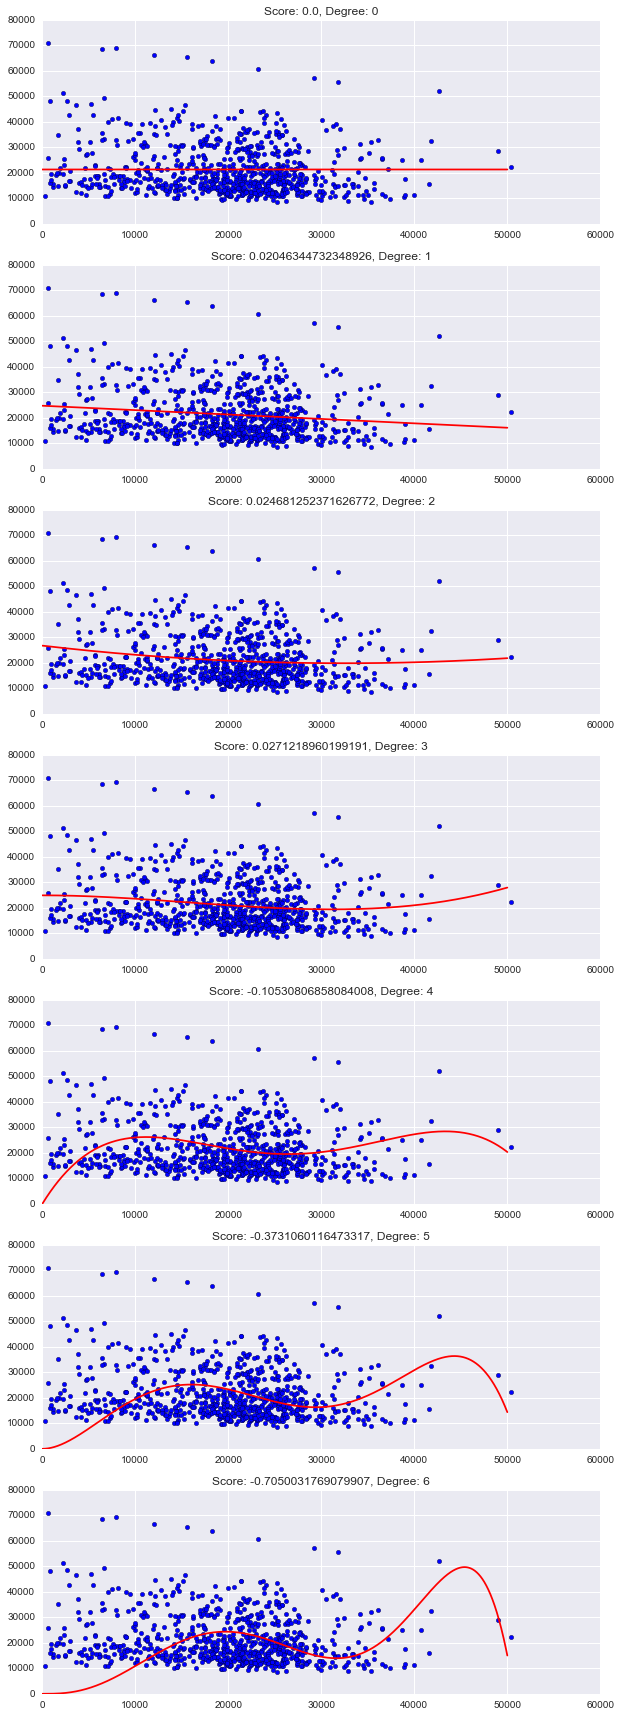

In [7]:
degrees = 7
fig, axs = plt.subplots(degrees, figsize=(10, 30))
for degree in range(degrees):
    
    model = Pipeline([('poly', PolynomialFeatures(degree)), 
                      ('linear', linear_model.LinearRegression(fit_intercept=False))])
    model.fit(mileage, price)
    score = model.score(mileage, price)
    subplot = axs[degree]
    subplot.scatter(mileage, price)
    subplot.plot(model.predict([[j] for j in range(50000)]), c='r')
    subplot.set_title("Score: {}, Degree: {}".format(score, degree))
    subplot.set_xlim(0)
    subplot.set_ylim(0)
plt.show()

### Notes
With R^2 scores of around .02 for both a normal linear regression and polynomial regression (best fit around 3 degrees), it seems like mileage compared to price is not an ideal tool.  


## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [8]:
stat_list = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
stats = df[stat_list]
price = df[['Price']]

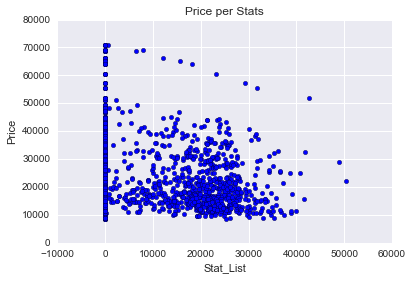

In [9]:
fig, ax = plt.subplots()
for stat in stat_list:
    ax.scatter(df[[stat]], price)
plt.title('Price per Stats')
plt.ylabel('Price')
plt.xlabel('Stat_List')
plt.show()

### Notes
Unless I'm wildly misunderstanding the point of linear regression (completely possible), I don't see this data set as being valuably represented with any sort of linear model.  The vertical lines at x=0, x=1; the seemingly random grouping, the somewhat friendly looking line at the top of the chart... all should work in cahoots to create a bad model.  I'd guess that I will see a very low simple linear regression model r^2 score.  Additionally, I think any polynomial modeling may require overfitting.  

In [10]:
combinations = []
for x in range(1, 8):
    combinations.append(itertools.combinations(stat_list, x))
    
best_score = 0
for item in combinations:
    for group in item:
        group = list(group)
        x = df[group]
        plinreg = linear_model.LinearRegression()
        plinreg.fit(x, price)
        if best_score < plinreg.score(x, price):
            best_score = plinreg.score(x, price)
            max_group = group
print(max_group, best_score)

['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.446264353673


In [11]:
combinations = []
for x in range(1, 8):
    combinations.append(itertools.combinations(stat_list, x))

best_score = 0
for item in combinations:
    for group in item:
        group = list(group)
        x = df[group]
        
        degrees = 9
        for degree in range(degrees):
            model = Pipeline([('poly', PolynomialFeatures(degree=degree)), ('linear', linear_model.LinearRegression(fit_intercept=False))]) 
            model = model.fit(x, price)
            model_score = model.score(x, price)     
        if best_score < model.score(x, price):
            best_score = model.score(x, price)
            mg = group
            md = degree
print(md, mg, best_score)


8 ['Cylinder', 'Liter', 'Doors', 'Sound', 'Leather'] 0.909362267486


### Notes
As guessed, an 8th degree polynomial regression was required and graphing this would look quite silly.  The data, organized this way, does not lend itself to linear regression. 

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [12]:
demos = pd.get_dummies(df[['Make', 'Model', 'Type']])

In [13]:
demos_df = df.join(demos)
demos_df.drop(['Make', 'Model', 'Trim', 'Type'], axis=1, inplace=True)
demos_df.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17542.036083,9135,6,3.1,4,1,1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16218.847862,13196,6,3.1,4,1,1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16336.913140,16342,6,3.1,4,1,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16339.170324,19832,6,3.1,4,1,0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
demo_cols = demos_df.columns.values
dX = demos_df[demo_cols[1:]]
dy = demos_df[['Price']]

dlin = linear_model.LinearRegression()
dlin.fit(dX, dy)
# print intercept and coefficients
print('Intercept:', dlin.intercept_)
print('Coefficient:', dlin.coef_)

# calculate the R-squared
print('R-squared:', dlin.score(dX, dy))

Intercept: [ 25165.82477925]
Coefficient: [[ -1.79761908e-01   5.42379044e+02   1.29237519e+03  -1.27829701e+03
    2.42035608e+01   2.18363418e+02   3.27988648e+02  -3.16039326e+03
    1.30213147e+04  -4.88007742e+03  -4.67567935e+03   4.71023130e+03
   -5.01539600e+03  -2.60920515e+03   4.76735849e+02   1.51108916e+03
    3.43085398e+03   1.90075746e+03  -4.93611922e+03   3.57062194e+02
    3.77804366e+03  -6.53389096e+03  -3.94804525e+03  -4.61122096e+03
   -2.89432746e+03  -2.94078233e+03   1.18477723e+04  -3.46964696e+03
    2.71553375e+02   5.52879392e+03  -3.98758695e+03  -1.56899086e+03
    4.38170518e+02  -2.67596496e+03  -2.33943105e+03   2.26749166e+02
   -1.34597822e+03  -2.48428616e+03   3.75401387e+01   2.57005676e+03
   -1.87689942e+02   2.99162869e+03  -4.35664023e+03  -9.19870791e+02
    1.64428702e+04   3.40614520e+03  -2.76699669e+03  -3.34485968e+02
   -5.19546067e+02   2.14883530e+02]]
R-squared: 0.980476870245


In [20]:
dy.shape

(804, 1)